# Yacht Insurance Claims Data 
##### NOTEBOOK 2


**Problem Statement:** What is the likelihood that a yacht insurance policy has at least 1 claim within five years?

**Contents:** 

1. Additional cleaning
2. Feature engineering
3. Datatype transformation
4. Exploratory data analysis/Visualizations
5. Dummifying categorical variables
6. Feature selection

**Important to note:** The point of this notebook was to clean and explore the data to ensure we had a dataset best prepared for modeling. Because we knew we would be predicting the number of claims a policy would have, we made sure to create columns and clean the data in a way to give our models the best chance at prediction. When expertise was needed to make a decision, the client was consulted for clarity.

___
## Import libraries and read in data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
combined = pd.read_csv('../datasets/combined.csv')

combined.head()

,Policy Number,New/Renl/Endt/Canc/Flat,Date of Birth,Married yes/no,Years Exp.,Occupation,Mailing State,Policy Eff-Date,Endo Eff-Date,Policy/Endo Canc Eff-Date,...,Length,Hull Type,Hull Limit,Power Type,# Engines,Mooring State,Mooring County,Mooring ZIP code,DOB_year,num_claims
0,nypcaf000314,new,1948-05-09,no,2.0,other,california,03/31/2016,NaN,NaN,...,63.0,multihull sail,"$ 500,000.00",inboard,2.0,mexico,nayarit,NaN,1948,NaN
1,nypcaf000315,new,1952-10-08,not reported,22.0,other,california,03/18/2016,NaN,NaN,...,61.0,sportfisher,"$ 1,275,000.00",inboard,2.0,ca,los angeles,90803,1952,NaN
2,nypcaf000318,new,1943-09-30,yes,30.0,not reported,california,03/30/2016,NaN,NaN,...,48.0,motoryacht,"$ 400,000.00",inboard,2.0,ca,los angeles,90803,1943,NaN
3,nypcaf000319,new,1977-04-25,not reported,20.0,not reported,california,03/30/2016,NaN,NaN,...,32.0,motoryacht,"$ 35,000.00",inboard,0.0,ca,los angeles,90802,1977,NaN
4,nypcaf000320,new,1951-06-28,no,30.0,not reported,california,04/02/2016,NaN,NaN,...,43.0,monohull sail,"$ 200,000.00",inboard,1.0,ca,los angeles,90803,1951,NaN


In [3]:
combined.shape

(6350, 23)

---
## Additional cleaning for combined dataframe

**BELOW:** After merging, the goal was to impute or fill any null rows if we could. Construction had some missing values so we filled the in with 'not reported'.

In [4]:
combined.isna().sum()

Policy Number                   0
New/Renl/Endt/Canc/Flat         0
Date of Birth                   0
Married yes/no                  0
Years Exp.                      0
Occupation                      0
Mailing State                   0
Policy Eff-Date                 0
Endo Eff-Date                5056
Policy/Endo Canc Eff-Date    5652
Builder                         0
Year Built                      0
Construction                   68
Length                          0
Hull Type                       0
Hull Limit                      0
Power Type                      0
# Engines                       0
Mooring State                 110
Mooring County                  0
Mooring ZIP code             1454
DOB_year                        0
num_claims                   5846
dtype: int64

In [5]:
# Fill all missing values for construction with 'not reported'
combined['Construction'] = combined['Construction'].fillna('not reported')
combined.isna().sum()

Policy Number                   0
New/Renl/Endt/Canc/Flat         0
Date of Birth                   0
Married yes/no                  0
Years Exp.                      0
Occupation                      0
Mailing State                   0
Policy Eff-Date                 0
Endo Eff-Date                5056
Policy/Endo Canc Eff-Date    5652
Builder                         0
Year Built                      0
Construction                    0
Length                          0
Hull Type                       0
Hull Limit                      0
Power Type                      0
# Engines                       0
Mooring State                 110
Mooring County                  0
Mooring ZIP code             1454
DOB_year                        0
num_claims                   5846
dtype: int64

---
## Engineer new columns (Age, Policy Length, Number of Claims)

### AGE

*We thought age would be more interpretable than just having a birthday date.*

In [6]:
# First, check the DOB column is still datetime object.
combined.dtypes

Policy Number                 object
New/Renl/Endt/Canc/Flat       object
Date of Birth                 object
Married yes/no                object
Years Exp.                   float64
Occupation                    object
Mailing State                 object
Policy Eff-Date               object
Endo Eff-Date                 object
Policy/Endo Canc Eff-Date     object
Builder                       object
Year Built                   float64
Construction                  object
Length                       float64
Hull Type                     object
Hull Limit                    object
Power Type                    object
# Engines                    float64
Mooring State                 object
Mooring County                object
Mooring ZIP code              object
DOB_year                       int64
num_claims                   float64
dtype: object

In [7]:
# Turn DOB back into datetime object
combined['Date of Birth'] = pd.to_datetime(combined['Date of Birth'])

#Double check
combined.dtypes

Policy Number                        object
New/Renl/Endt/Canc/Flat              object
Date of Birth                datetime64[ns]
Married yes/no                       object
Years Exp.                          float64
Occupation                           object
Mailing State                        object
Policy Eff-Date                      object
Endo Eff-Date                        object
Policy/Endo Canc Eff-Date            object
Builder                              object
Year Built                          float64
Construction                         object
Length                              float64
Hull Type                            object
Hull Limit                           object
Power Type                           object
# Engines                           float64
Mooring State                        object
Mooring County                       object
Mooring ZIP code                     object
DOB_year                              int64
num_claims                      

In [8]:
# Create an age column
date_today = datetime.today().year # take the year from today's date
combined['Age'] = combined['Date of Birth'].map(lambda x: date_today - x.year) # subtract the year from the DOB
combined['Age']

0       73
1       69
2       78
3       44
4       70
        ..
6345    82
6346    78
6347    34
6348    57
6349    57
Name: Age, Length: 6350, dtype: int64

#### POLICY LENGTH

**BELOW:** We wanted to know how long the policy was held. We subtracted 'Policy/Endo Canc Eff-Date' from 'Policy Eff-Date' in order to do this. In the case where a policy had not been cancelled, we imputed the value by using today's date (Jan. 23 2021).

In [9]:
combined[combined['Policy/Endo Canc Eff-Date'].notna()]

,Policy Number,New/Renl/Endt/Canc/Flat,Date of Birth,Married yes/no,Years Exp.,Occupation,Mailing State,Policy Eff-Date,Endo Eff-Date,Policy/Endo Canc Eff-Date,...,Hull Type,Hull Limit,Power Type,# Engines,Mooring State,Mooring County,Mooring ZIP code,DOB_year,num_claims,Age
38,nypcaf000355,canc,1955-01-04,yes,30.0,not reported,california,07/02/2016,NaN,12/23/2016,...,motoryacht,"$ 625,000.00",inboard,2.0,california,orange,92661,1955,NaN,66
50,nypcaf000368,canc,1945-07-08,yes,40.0,other,florida,05/06/2016,NaN,04/01/2017,...,motoryacht,"$ 135,000.00",inboard,1.0,fl,broward,33019,1945,NaN,76
57,nypcaf000376,canc,1955-08-22,yes,15.0,retired,florida,05/24/2016,NaN,03/07/2017,...,motoryacht,"$ 59,950.00",inboard,2.0,fl,bay,32411,1955,NaN,66
60,nypcaf000379,canc,1963-04-02,yes,30.0,other,california,06/01/2016,NaN,02/02/2017,...,express cruiser,"$ 700,000.00",pod,2.0,ca,orange,92661,1963,NaN,58
64,nypcaf000383,canc,1958-08-08,yes,25.0,retired,florida,05/27/2016,NaN,12/05/2016,...,motoryacht,"$ 330,000.00",inboard,2.0,fl,manatee,34221,1958,NaN,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,nypcaf001768-2,endt-canc,1939-12-27,not reported,30.0,retired,oregon,02/22/2020,02/22/2020,12/04/2020,...,motoryacht,"$ 505,000.00",inboard,2.0,mexico,bcs,cp2300,1939,NaN,82
6346,nypcaf002441,endt,1943-10-13,yes,40.0,not reported,california,04/05/2019,01/29/2020,01/29/2020,...,monohull sail,"$ 1,500,000.00",inboard,1.0,ca,santa cruz,95062,1943,NaN,78
6347,nypcaf001800-2,endt,1987-11-30,not reported,30.0,other,california,03/01/2020,04/28/2020,04/28/2020,...,monohull sail,"$ 225,000.00",inboard,1.0,ca,alameda,94710,1987,NaN,34
6348,nypcaf002391-1,endt-canc,1964-07-02,not reported,5.0,business owner,california,03/15/2020,08/19/2020,09/17/2020,...,express cruiser,"$ 325,000.00",inboard,2.0,ca,orange,92663,1964,NaN,57


In [10]:
# Change the column into a string
combined['Policy/Endo Canc Eff-Date'] = combined['Policy/Endo Canc Eff-Date'].astype(str)

# Create a list of all the Canc date years
years_list = []
for n in combined['Policy/Endo Canc Eff-Date']:
    years_list.append(n[6:10])

# Create column of year cancelled
combined['canc_year'] = years_list

# Turn it into a numeric column
combined['canc_year']  = pd.to_numeric(combined['canc_year'])

# Look at how many problems there are
len(combined[combined['canc_year'] > 2020])

10

In [11]:
# Drop rows with dates over 2020
combined.drop(combined.loc[combined['canc_year'] > 2020].index, inplace=True)

In [12]:
# Turn policy eff date into date/time object
combined['Policy Eff-Date'] = pd.to_datetime(combined['Policy Eff-Date'])

# Turn endorsement/policy cancellation date into date/time object
combined['Policy/Endo Canc Eff-Date'] = pd.to_datetime(combined['Policy/Endo Canc Eff-Date'])

# Turn endorsement effective date into date/time object
combined['Endo Eff-Date'] = pd.to_datetime(combined['Endo Eff-Date'])

# Create a policy length column
combined['policy_length'] = (combined['Policy/Endo Canc Eff-Date'] - combined['Policy Eff-Date']).dt.days
combined['policy_length']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
6345    286.0
6346    299.0
6347     58.0
6348    186.0
6349    186.0
Name: policy_length, Length: 6340, dtype: float64

In [13]:
# Was having issues with my models so instead of "today's date" I chose a permanent date. (Jan. 23, 2021)
jan_23_date = datetime(2021, 1, 23, 9, 57, 27, 600637)

In [14]:
# Impute null policy lengths using today's date
combined['policy_length'] = combined['policy_length'].fillna((jan_23_date - combined['Policy Eff-Date']).dt.days)
combined['policy_length'].value_counts()# Impute null policy lengths using today's date
combined['policy_length'] = combined['policy_length'].fillna((jan_23_date - combined['Policy Eff-Date']).dt.days)
combined['policy_length'].value_counts()

0.0       35
967.0     31
633.0     28
814.0     28
694.0     25
          ..
1543.0     1
1168.0     1
1246.0     1
854.0      1
922.0      1
Name: policy_length, Length: 1536, dtype: int64

#### NUMBER OF CLAIMS

*This column was already created, but when we merged we had a lot of null values. Need to replace them with 0.*

In [15]:
# Fill na columns with 1 for having only 1 claim
combined['num_claims'] = combined['num_claims'].fillna(0)

combined['num_claims'].value_counts()

0.0    5836
1.0     421
2.0      68
3.0      15
Name: num_claims, dtype: int64

---
##  Drop columns we won't be needing for modeling 

In [16]:
combined.columns

Index(['Policy Number', 'New/Renl/Endt/Canc/Flat', 'Date of Birth',
       'Married yes/no', 'Years Exp.', 'Occupation', 'Mailing State',
       'Policy Eff-Date', 'Endo Eff-Date', 'Policy/Endo Canc Eff-Date',
       'Builder', 'Year Built', 'Construction', 'Length', 'Hull Type',
       'Hull Limit', 'Power Type', '# Engines', 'Mooring State',
       'Mooring County', 'Mooring ZIP code', 'DOB_year', 'num_claims', 'Age',
       'canc_year', 'policy_length'],
      dtype='object')

In [17]:
# Only keeping the columns I need for modeling
combined = combined[['New/Renl/Endt/Canc/Flat', 'Married yes/no', 'Years Exp.', 'Occupation',
                   'Builder', 'Year Built', 'Construction', 'Length', 'Hull Type','Hull Limit',
                    'Power Type', '# Engines', 'Mooring County','num_claims', 'Age', 'policy_length']]

combined.head()

,New/Renl/Endt/Canc/Flat,Married yes/no,Years Exp.,Occupation,Builder,Year Built,Construction,Length,Hull Type,Hull Limit,Power Type,# Engines,Mooring County,num_claims,Age,policy_length
0,new,no,2.0,other,other,1997.0,fiberglass,63.0,multihull sail,"$ 500,000.00",inboard,2.0,nayarit,0.0,73,1759.0
1,new,not reported,22.0,other,viking,2006.0,fiberglass,61.0,sportfisher,"$ 1,275,000.00",inboard,2.0,los angeles,0.0,69,1772.0
2,new,yes,30.0,not reported,offshore,2001.0,fiberglass,48.0,motoryacht,"$ 400,000.00",inboard,2.0,los angeles,0.0,78,1760.0
3,new,not reported,20.0,not reported,other,1973.0,fiberglass,32.0,motoryacht,"$ 35,000.00",inboard,0.0,los angeles,0.0,44,1760.0
4,new,no,30.0,not reported,other,1989.0,fiberglass,43.0,monohull sail,"$ 200,000.00",inboard,1.0,los angeles,0.0,70,1757.0


---
## Deal with large number of values for Mooring County column

**BELOW:** We knew that there were a lot of values for this column. Additionally, we knew some locations were entered in differently. Since we were unable to search for all these instances, we decided to keep only counties that had at least 25 instances (top 49 counties).

In [18]:
combined['Mooring County'].value_counts()[:50]

broward          397
bcs              374
los angeles      353
orange           339
san diego        337
nayarit          227
miami-dade       221
sarasota         218
pinellas         201
manatee          172
south pacific    141
sonora           128
palm beach       122
panama           119
grenada          116
king             113
lee              107
caribbean         91
jalisco           87
martin            87
monroe            86
alameda           74
med               74
charlotte         68
sinaloa           63
honolulu          62
bcn               59
santa cruz        56
contra costa      53
galveston         51
new zealand       47
costa rica        47
canada            47
san mateo         45
miami dade        44
san francisco     44
ventura           43
collier           40
nueces            39
marin             38
hillsborough      37
brevard           36
volusia           36
skagit            33
anne arundel      30
escambia          29
st. lucie         27
whatcom      

In [19]:
# Create a list of the top 49 most common counties 
top_49_county = combined['Mooring County'].value_counts()[:49].index.to_list()

# Replace all the other types with 'other'
combined['Mooring County'] = combined['Mooring County'].apply(lambda x: 'other' if x not in top_49_county else x)
combined['Mooring County'].value_counts()

other            1030
broward           397
bcs               374
los angeles       353
orange            339
san diego         337
nayarit           227
miami-dade        221
sarasota          218
pinellas          201
manatee           172
south pacific     141
sonora            128
palm beach        122
panama            119
grenada           116
king              113
lee               107
caribbean          91
jalisco            87
martin             87
monroe             86
med                74
alameda            74
charlotte          68
sinaloa            63
honolulu           62
bcn                59
santa cruz         56
contra costa       53
galveston          51
new zealand        47
costa rica         47
canada             47
san mateo          45
san francisco      44
miami dade         44
ventura            43
collier            40
nueces             39
marin              38
hillsborough       37
brevard            36
volusia            36
skagit             33
anne arund

## Check the data types of each column

*We wanted to make sure no numerical columns are incorrectly object columns. We found 'Hull Limit' was an instance of this.*

In [20]:
combined.dtypes

New/Renl/Endt/Canc/Flat     object
Married yes/no              object
Years Exp.                 float64
Occupation                  object
Builder                     object
Year Built                 float64
Construction                object
Length                     float64
Hull Type                   object
Hull Limit                  object
Power Type                  object
# Engines                  float64
Mooring County              object
num_claims                 float64
Age                          int64
policy_length              float64
dtype: object

In [21]:
# Check what column looks like
combined['Hull Limit']

0          $ 500,000.00 
1        $ 1,275,000.00 
2          $ 400,000.00 
3           $ 35,000.00 
4          $ 200,000.00 
              ...       
6345       $ 505,000.00 
6346     $ 1,500,000.00 
6347       $ 225,000.00 
6348       $ 325,000.00 
6349       $ 325,000.00 
Name: Hull Limit, Length: 6340, dtype: object

**BELOW:** Turn 'Hull Limit' into a numerical column.

In [22]:
# Get rid of characters
combined['Hull Limit'] = combined['Hull Limit'].str.replace(',', '')
combined['Hull Limit'] = combined['Hull Limit'].str.replace('$', '')

# Remove whitespace
combined['Hull Limit'] = combined['Hull Limit'].str.strip()

# Change to a float
combined['Hull Limit'] = combined['Hull Limit'].astype(float)

# Show new values for column
combined['Hull Limit']

0        500000.0
1       1275000.0
2        400000.0
3         35000.0
4        200000.0
          ...    
6345     505000.0
6346    1500000.0
6347     225000.0
6348     325000.0
6349     325000.0
Name: Hull Limit, Length: 6340, dtype: float64

## Look at correlation of numerical values

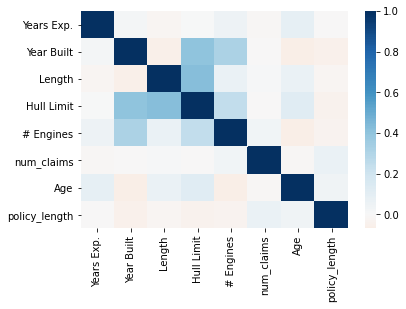

In [23]:
sns.heatmap(combined.corr(), cmap='RdBu',center=0);

In [24]:
combined.dtypes

New/Renl/Endt/Canc/Flat     object
Married yes/no              object
Years Exp.                 float64
Occupation                  object
Builder                     object
Year Built                 float64
Construction                object
Length                     float64
Hull Type                   object
Hull Limit                 float64
Power Type                  object
# Engines                  float64
Mooring County              object
num_claims                 float64
Age                          int64
policy_length              float64
dtype: object

In [25]:
combined['Power Type'].value_counts()

inboard     5721
outboard     404
pod          145
i/o           70
Name: Power Type, dtype: int64

**Interpretation:** While hull limit (price of the boat) is fairly highly correlated with length of the boat and # of engines, I decided to keep all of these features for modeling. The client said that they charge higher premiums for the number of engines because they've been told they are targets of theft. Additionally, the length of the boat could affect its navigation, anchoring, or storm survival ability.

### Look at outliers

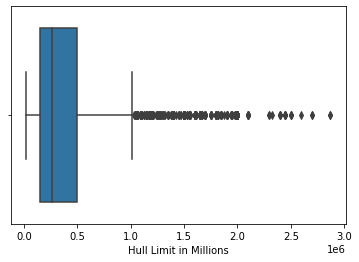

In [26]:
sns.boxplot(x=combined['Hull Limit'])
plt.xlabel('Hull Limit in Millions');

*While there are outliers, I think they could be important for the model and will keep.*

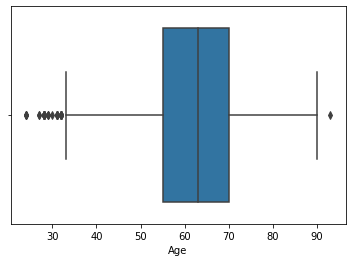

In [27]:
sns.boxplot(x=combined['Age']);

*While there are outliers, I think they could be important for the model and will keep.*

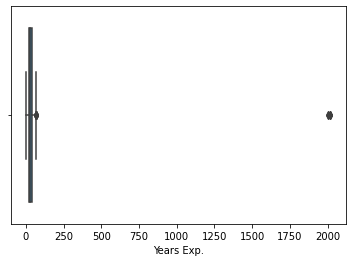

In [28]:
sns.boxplot(x=combined['Years Exp.']);

*Some VERY large outliers. Someone can't have this many years of experience.*

In [29]:
# Look at the outliers
combined[combined['Years Exp.'] > 75]

,New/Renl/Endt/Canc/Flat,Married yes/no,Years Exp.,Occupation,Builder,Year Built,Construction,Length,Hull Type,Hull Limit,Power Type,# Engines,Mooring County,num_claims,Age,policy_length
819,new,yes,2000.0,other,other,2000.0,fiberglass,40.0,motoryacht,82000.0,inboard,2.0,other,0.0,56,1320.0
1541,new,yes,2017.0,retired,other,2017.0,fiberglass,34.0,outboard power,492322.0,outboard,3.0,sarasota,0.0,76,1124.0
2136,renl,yes,2000.0,other,other,2000.0,fiberglass,40.0,motoryacht,82000.0,inboard,2.0,other,0.0,56,955.0
2974,renl,yes,2017.0,retired,other,2017.0,fiberglass,34.0,outboard power,492322.0,outboard,3.0,sarasota,0.0,76,759.0
3546,new,yes,2018.0,not reported,viking,2018.0,fiberglass,37.0,sportfisher,845000.0,inboard,2.0,pinellas,0.0,66,666.0
4402,renl,yes,2017.0,retired,other,2017.0,fiberglass,34.0,outboard power,492322.0,outboard,3.0,sarasota,0.0,76,394.0
5382,endt,yes,2017.0,retired,other,2017.0,fiberglass,34.0,outboard power,492322.0,outboard,3.0,sarasota,0.0,76,759.0


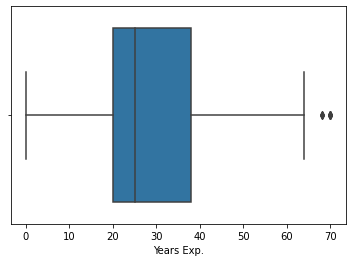

In [30]:
# change values to be the average years experience instead
combined['Years Exp.'] = combined['Years Exp.'].apply(lambda x:combined['Years Exp.'].mean() if x > 75 else x)
# view outliers
sns.boxplot(x=combined['Years Exp.']);

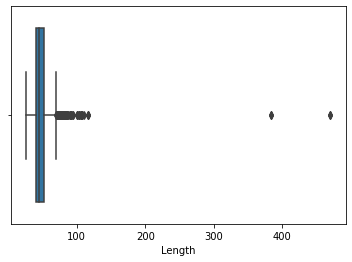

In [31]:
# Check the length of the boat
sns.boxplot(x=combined['Length']);

In [32]:
# Look at the outliers
combined[combined['Length'] > 200]

,New/Renl/Endt/Canc/Flat,Married yes/no,Years Exp.,Occupation,Builder,Year Built,Construction,Length,Hull Type,Hull Limit,Power Type,# Engines,Mooring County,num_claims,Age,policy_length
268,new,yes,25.0,other,other,1983.0,fiberglass,384.0,monohull sail,50000.0,inboard,1.0,miami-dade,1.0,39,1551.0
311,new,yes,40.0,other,other,2002.0,fiberglass,470.0,multihull sail,330000.0,inboard,2.0,caribbean,0.0,58,1523.0
1219,renl,yes,25.0,other,other,1983.0,fiberglass,384.0,monohull sail,50000.0,inboard,1.0,miami-dade,0.0,39,1186.0
1247,renl,yes,40.0,other,other,2002.0,fiberglass,470.0,multihull sail,330000.0,inboard,2.0,caribbean,0.0,58,1158.0
2716,renl,yes,25.0,other,other,1983.0,fiberglass,384.0,monohull sail,50000.0,inboard,1.0,miami-dade,0.0,39,821.0
2838,renl,yes,40.0,other,other,2002.0,fiberglass,470.0,multihull sail,330000.0,inboard,2.0,other,0.0,58,793.0


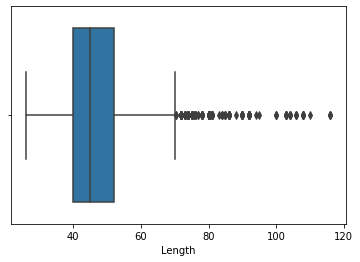

In [33]:
# change values to be the average length experience instead
combined['Length'] = combined['Length'].apply(lambda x:combined['Length'].mean() if x > 200 else x)
# view outliers
sns.boxplot(x=combined['Length']);

*These numbers look plausible so we don't want to drop any. Plus, one of them has a claim which we really don't want to drop.*

## Visualizations of different features

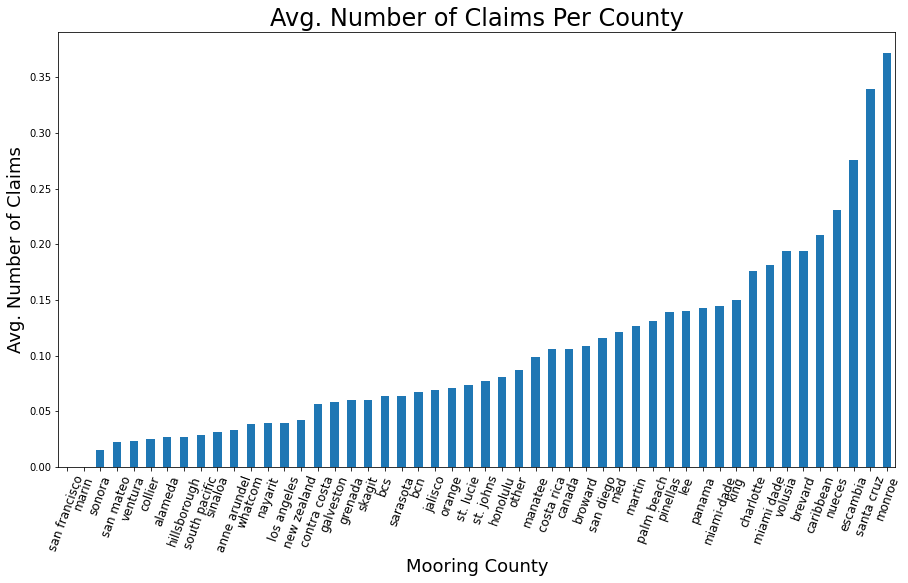

In [34]:
# Plot avg. number of claims  per county
plt.figure(figsize= (15, 8))
combined.groupby('Mooring County')['num_claims'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation= 70,fontsize = 12)
plt.xlabel('Mooring County',fontsize=18)
plt.ylabel('Avg. Number of Claims', fontsize=18)
plt.title('Avg. Number of Claims Per County', fontsize=24)
plt.savefig('../images/claims_per_county.png', dpi=300, bbox_inches='tight');

In [35]:
combined['Hull Limit'].value_counts().sort_values()

598000.0       1
631000.0       1
737000.0       1
319000.0       1
1875000.0      1
            ... 
400000.0     145
150000.0     146
300000.0     158
250000.0     160
200000.0     182
Name: Hull Limit, Length: 567, dtype: int64

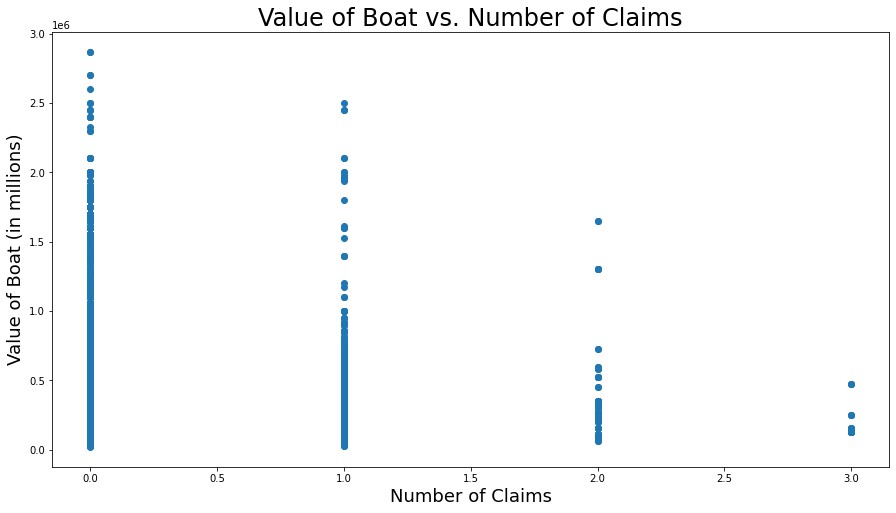

In [36]:
# Plot hull limit vs. number of claims
plt.figure(figsize= (15, 8))

plt.scatter(combined['num_claims'], combined['Hull Limit'])
plt.xlabel('Number of Claims',fontsize=18)
plt.ylabel('Value of Boat (in millions)', fontsize=18)
plt.title('Value of Boat vs. Number of Claims',fontsize=24)
plt.savefig('../images/hull_limit_vs_claims.png', dpi=300, bbox_inches='tight');

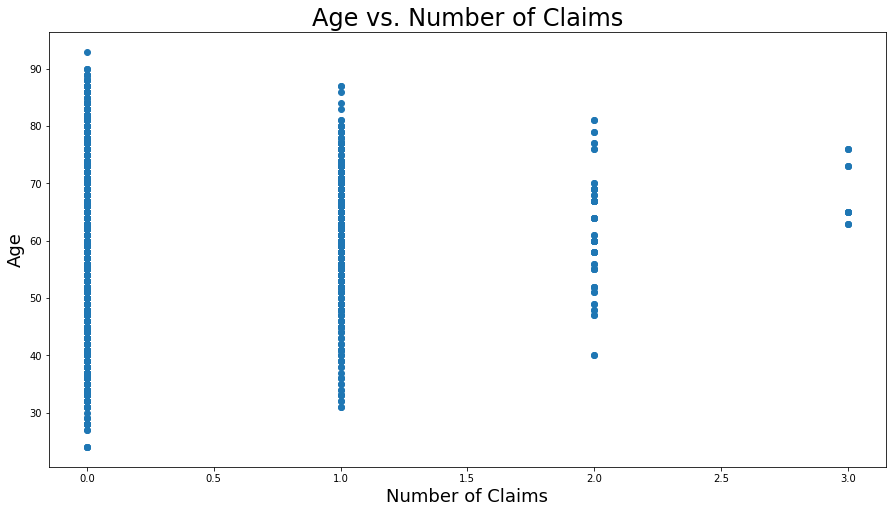

In [37]:
# Plot age vs. number of claims
plt.figure(figsize= (15, 8))

plt.scatter(combined['num_claims'], combined['Age'])
plt.xlabel('Number of Claims',fontsize=18)
plt.ylabel('Age', fontsize=18)
plt.title('Age vs. Number of Claims',fontsize=24)
plt.savefig('../images/age_vs_claims.png', dpi=300, bbox_inches='tight');

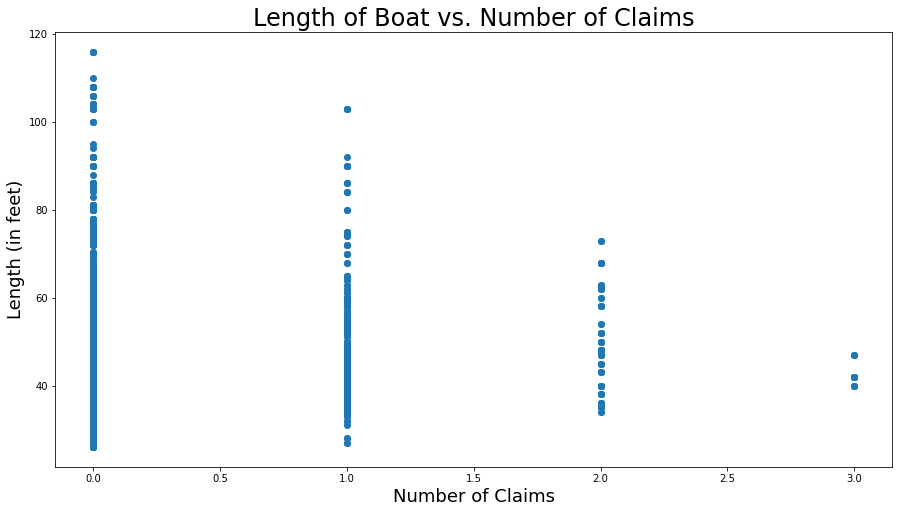

In [38]:
# Plot length of boat vs. number of claims
plt.figure(figsize= (15, 8))
plt.scatter(combined['num_claims'], combined['Length'])
plt.xlabel('Number of Claims',fontsize=18)
plt.ylabel('Length (in feet)', fontsize=18)
plt.title('Length of Boat vs. Number of Claims',fontsize=24)
plt.savefig('../images/length_vs_claims.png', dpi=300, bbox_inches='tight');

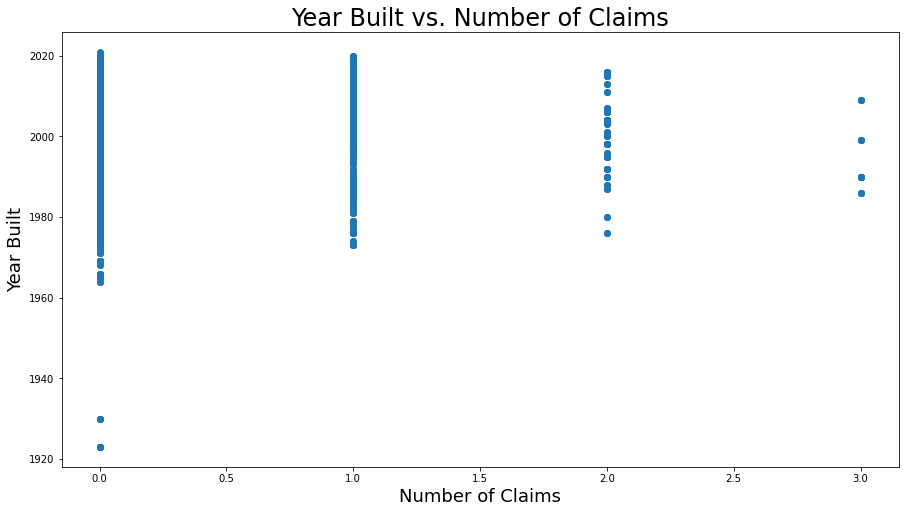

In [39]:
# Plot year built vs. number of claims
plt.figure(figsize= (15, 8))
plt.scatter(combined['num_claims'], combined['Year Built'])
plt.xlabel('Number of Claims',fontsize=18)
plt.ylabel('Year Built', fontsize=18)
plt.title('Year Built vs. Number of Claims',fontsize=24)
plt.savefig('../images/year_built_vs_claims.png', dpi=300, bbox_inches='tight');

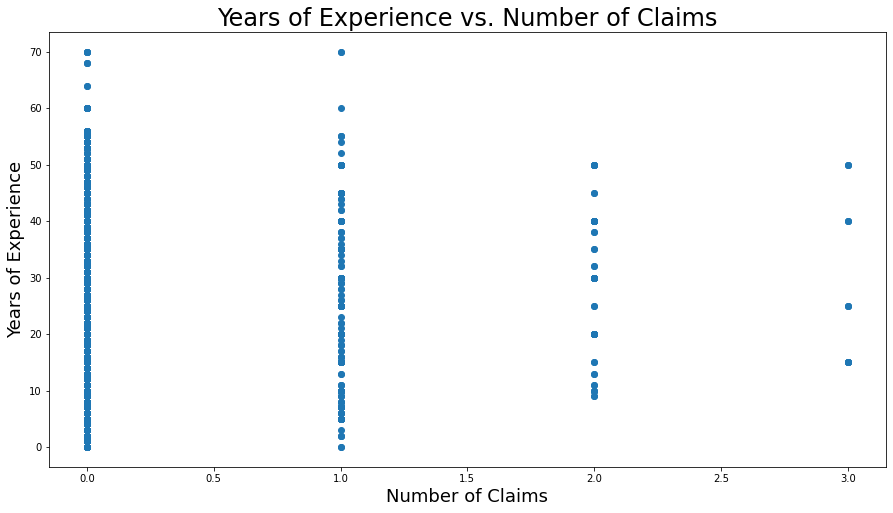

In [40]:
# Plot years exp. vs. number of claims
plt.figure(figsize= (15, 8))
plt.scatter(combined['num_claims'], combined['Years Exp.'])
plt.xlabel('Number of Claims',fontsize=18)
plt.ylabel('Years of Experience', fontsize=18)
plt.title('Years of Experience vs. Number of Claims',fontsize=24)
plt.savefig('../images/experience_vs_claims.png', dpi=300, bbox_inches='tight');

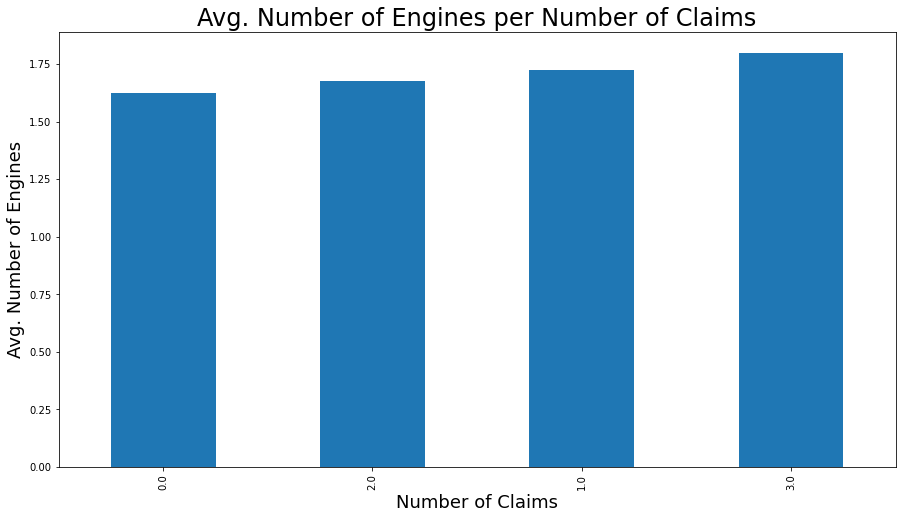

In [41]:
# Plot # of engines vs. number of claims
plt.figure(figsize= (15, 8))
combined.groupby('num_claims')['# Engines'].mean().sort_values().plot(kind='bar')
plt.xlabel('Number of Claims',fontsize=18)
plt.ylabel('Avg. Number of Engines', fontsize=18)
plt.title('Avg. Number of Engines per Number of Claims',fontsize=24)
plt.savefig('../images/engines_vs_claims.png', dpi=300, bbox_inches='tight');

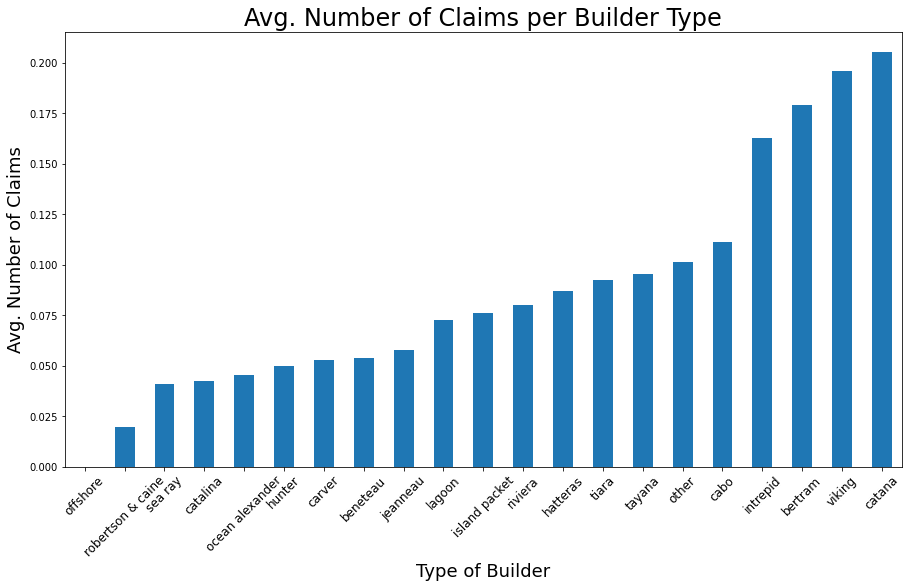

In [42]:
# Plot avg. number of claims per builder vs. number of claims
plt.figure(figsize= (15, 8))
combined.groupby('Builder')['num_claims'].mean().sort_values().plot(kind='bar')
plt.xlabel('Type of Builder',fontsize=18)
plt.xticks(rotation= 45,fontsize = 12)
plt.ylabel('Avg. Number of Claims', fontsize=18)
plt.title('Avg. Number of Claims per Builder Type',fontsize=24)
plt.savefig('../images/builder_vs_claims.png', dpi=300, bbox_inches='tight');

## Dummify categorical columns

In [43]:
# Starting with 16 columns
combined.shape

(6340, 16)

In [44]:
# Find categorical columns
cat_features = combined.select_dtypes(include='object')
cat_features

,New/Renl/Endt/Canc/Flat,Married yes/no,Occupation,Builder,Construction,Hull Type,Power Type,Mooring County
0,new,no,other,other,fiberglass,multihull sail,inboard,nayarit
1,new,not reported,other,viking,fiberglass,sportfisher,inboard,los angeles
2,new,yes,not reported,offshore,fiberglass,motoryacht,inboard,los angeles
3,new,not reported,not reported,other,fiberglass,motoryacht,inboard,los angeles
4,new,no,not reported,other,fiberglass,monohull sail,inboard,los angeles
...,...,...,...,...,...,...,...,...
6345,endt-canc,not reported,retired,other,fiberglass,motoryacht,inboard,bcs
6346,endt,yes,not reported,other,fiberglass,monohull sail,inboard,santa cruz
6347,endt,not reported,other,other,fiberglass,monohull sail,inboard,alameda
6348,endt-canc,not reported,business owner,other,fiberglass,express cruiser,inboard,orange


In [45]:
cat_features = ['New/Renl/Endt/Canc/Flat','Married yes/no','Occupation','Builder',
                 'Construction','Hull Type','Power Type','Mooring County']

In [46]:
combined.columns

Index(['New/Renl/Endt/Canc/Flat', 'Married yes/no', 'Years Exp.', 'Occupation',
       'Builder', 'Year Built', 'Construction', 'Length', 'Hull Type',
       'Hull Limit', 'Power Type', '# Engines', 'Mooring County', 'num_claims',
       'Age', 'policy_length'],
      dtype='object')

In [47]:
# Dummify categorical features we will use for the model
combined = pd.get_dummies(combined, columns = cat_features, drop_first= True)
combined.shape

(6340, 118)

**ABOVE:** We went from having 16 columns to 118 after dummifying the categorical variables.

### Save new df to use for modeling

In [48]:
combined.to_csv('../datasets/combined2.csv', index= False)

---
## Conclusion

In this notebook we did some additional data cleaning, feature, engineering, and dummifying columns to get our dataset ready for modeling. When we began our dataframe had 6350 rows and 23 columns. We ended with a dataframe of 6340 rows and 118 columns. This is great that we were able to fill/impute missing values and only drop 10 rows from our dataframe. 

## Next Notebook:

In the following notebook, *03_Modeling_and_Results*, we will test 4 main models for our binary classification problem: KNN, Logistic Regression, Random Forest, and Extra Trees. We will test out different methods of over and undersampling in order to reduce the delta between percent of majority class (no claims) with the minority class (at least one claim).